In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
import math
import timeit
from tqdm.notebook import tqdm

In [7]:
def f_1(x):
    return np.power(x, 3)

def f_2(x):
    return np.abs(x-0.2)

def f_3(x):
    return np.multiply(x, np.sin(1/x))

In [9]:
def exhaustive_search(f, a, b):
    n = (b-a)/eps
    f_min = f(a)
    count = 1
    x_min = a
    for i in range(int(n)):
        f_new = f(a + i*(b-a)/n)
        count += 1
        if f_new < f_min:
            f_min = f_new
            x_min = a + i*(b-a)/n
    
    return x_min, count, int(n)

In [10]:
def dichotomy(f, a, b):
    beta = eps/2
    count = 0
    iterations = 0
    while np.abs(a-b) > eps:
        iterations +=1
        x_1 = (a + b - beta)/2
        x_2 = (a + b + beta)/2
        count += 2
        
        if f(x_1) <= f(x_2):
            b = x_2
        else:
            a = x_1
    
    return (a+b) / 2, count, int(iterations)

In [6]:
invphi = (math.sqrt(5) - 1) / 2 
invphi2 = (3 - math.sqrt(5)) / 2 

def golden_section_search(f, a, b):
    count = 0
    (a, b) = (min(a, b), max(a, b))
    h = b - a

    # Required steps to achieve eps
    n = int(math.ceil(math.log(eps / h) / math.log(invphi)))

    c = a + invphi2 * h
    d = a + invphi * h
    yc = f(c)
    yd = f(d)
    count = 2
    for k in range(n-1):
        if yc < yd:
            b = d
            d = c
            yd = yc
            h = invphi * h
            c = a + invphi2 * h
            yc = f(c)
            count += 1
        else:
            a = c
            c = d
            yc = yd
            h = invphi * h
            d = a + invphi * h
            yd = f(d)
            count += 1

    if yc < yd:
        return (a+d)/2, count, n
    else:
        return (c+b)/2, count, n

In [10]:
# exhaustive_search
exhaustive_search(f_1, 0, 1)

(0, 10001, 10000)

In [11]:
exhaustive_search(f_2, 0, 1)

(0.2, 10001, 10000)

In [12]:
exhaustive_search(f_3, 0.01, 1)

(0.2225, 9901, 9900)

In [13]:
# dichotomy
dichotomy(f_1, 0, 1)

(4.0258026123046875e-05, 30, 15)

In [14]:
dichotomy(f_2, 0, 1)

(0.2000119483947754, 30, 15)

In [15]:
dichotomy(f_3, 0.01, 1)

(0.22254341049194337, 30, 15)

In [16]:
# golden section search
golden_section_search(f_1, 0, 1)

(3.305348067594804e-05, 21, 20)

In [17]:
golden_section_search(f_2, 0, 1)

(0.2000198320884056, 21, 20)

In [18]:
golden_section_search(f_3, 0.01, 1)

(0.22253575499749817, 21, 20)

<h1>Task 2</h1>

In [366]:
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)
x = np.linspace(0, 1, 101)
y = np.zeros(101)
y_no_noise = np.zeros(101)
alpha, beta

(0.7133135232008959, 0.5449205736556519)

In [385]:
for i in range(len(x)):
    y[i] = alpha*x[i] + beta + np.random.normal(0, 1)
    
for i in range(len(x)):
    y_no_noise[i] = alpha*x[i] + beta

In [386]:
def f_linear(x, a, b):
    return a * x + b

def f_rational(x, a, b):
    return a / (1 + b * x)

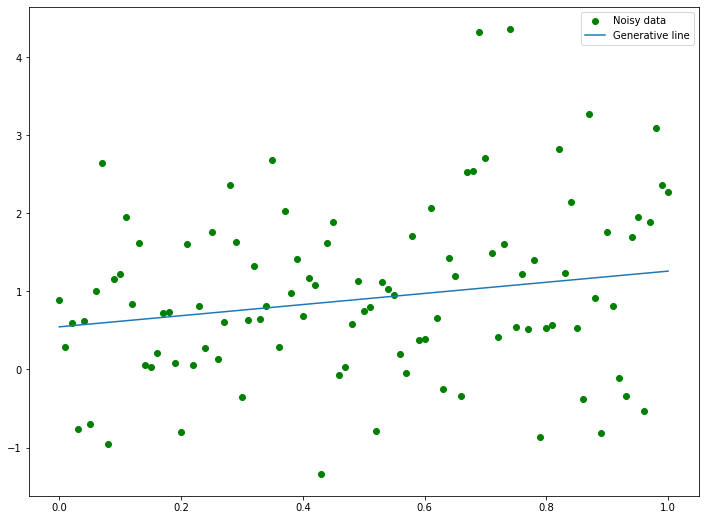

In [406]:
plt.figure(figsize=(12,9))
plt.scatter(x, y, label='Noisy data', color='green')
plt.plot(x, y_no_noise, label='Generative line')
plt.legend()
plt.savefig("generative.png")

In [388]:
def least_squares(ab):
    a, b = ab
    global x, y 
    lst_sqr = [(f_linear(x[i],a,b) - y[i]) ** 2 for i in range(len(x))]       
    return np.sum(lst_sqr)

In [389]:
def brute_2d(func, limits, eps):
    ab1, ab2 = limits
    
    a1, b1 = ab1
    n1 = int((b1 - a1) / eps)  
    
    a2, b2 = ab2
    n2 = int((b2 - a2) / eps)
    
    min_y = float("inf")
    min_x = 0
    
    for k1 in tqdm(range(n1 + 1)):
        x1 = a1 + k1 * (b1 - a1) / n1
        for k2 in range(n2 + 1):
            x2 = a2 + k2 * (b2 - a2) / n2
            
            y = func((x1, x2))
            if y < min_y:
                min_y = y
                min_x = (x1, x2)
    return min_x, min_y

In [395]:
lin_exh_x, lin_exh_b = brute_2d(least_squares, limits=((0, 1), (0, 1)), eps=0.003)[0]

  0%|          | 0/334 [00:00<?, ?it/s]

In [396]:
lin_gauss_x, lin_gauss_b = optimize.minimize(least_squares, [1, 1], method='Powell').x

In [397]:
lin_NM_x, lin_NM_b = optimize.minimize(least_squares, [1, 1], method='Nelder-Mead', options={'xatol' : 1e-3}).x

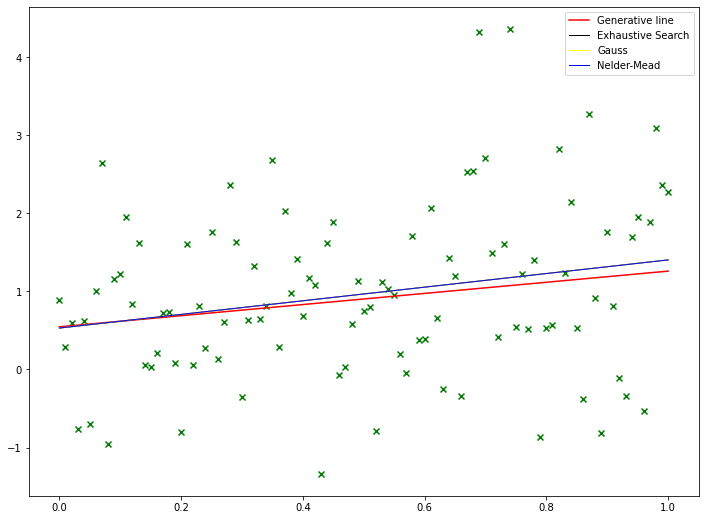

In [405]:
plt.figure(figsize=(12,9))
plt.scatter(x, y, marker="x", color='green')
plt.plot(x, y_no_noise, color='red', label='Generative line')
plt.plot(x, [f_linear(x[i], lin_exh_x, lin_exh_b) for i in  range(len(x))], label='Exhaustive Search', color='black', linewidth=1)
plt.plot(x, [f_linear(x[i], lin_gauss_x, lin_gauss_b) for i in  range(len(x))], label='Gauss', color='yellow', linewidth=1)
plt.plot(x, [f_linear(x[i], lin_NM_x, lin_NM_b) for i in  range(len(x))], label='Nelder-Mead', color='blue', linewidth=1)
plt.legend()
plt.savefig("linear")

In [399]:
def least_squares_rational(ab):
    a, b = ab
    global x, y
    return np.sum( (f_rational(x, a, b) - y)**2) / x.shape[0]

In [400]:
rat_exh_x, rat_exh_b = brute_2d(least_squares_rational, limits=((-1, 1), (-1, 1)), eps=0.01)[0]
rat_exh_x, rat_exh_b

  0%|          | 0/201 [00:00<?, ?it/s]

C:\Users\4CFA~1\AppData\Local\Temp/ipykernel_17728/3542971422.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return a / (1 + b * x)
C:\Users\4CFA~1\AppData\Local\Temp/ipykernel_17728/3542971422.py:5: RuntimeWarning: invalid value encountered in true_divide
  return a / (1 + b * x)


(0.6499999999999999, -0.5700000000000001)

In [401]:
rat_gauss_x, rat_gauss_b = optimize.minimize(least_squares_rational, [1, 1], method='Powell').x
rat_gauss_x, rat_gauss_b

(0.6511529998630865, -0.5724261182102853)

In [402]:
rat_NM_x, rat_NM_b = optimize.minimize(least_squares_rational, [1, 1], method='Nelder-Mead', options={'xatol' : 1e-3}).x
rat_NM_x, rat_NM_b

(0.6512268900891245, -0.5724745445324553)

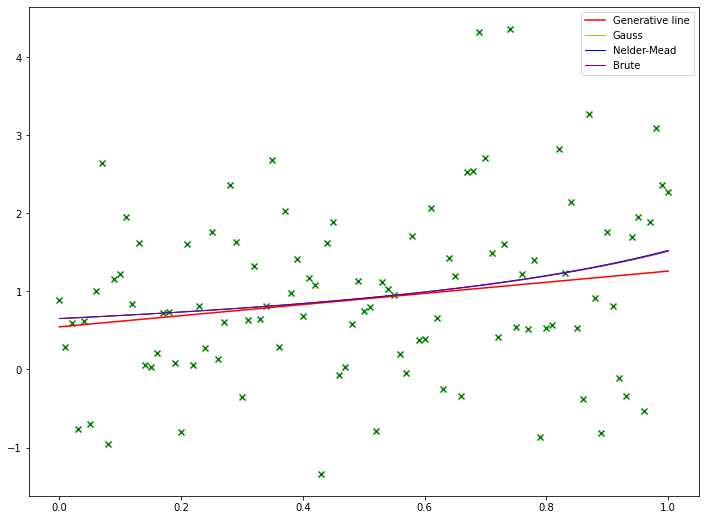

In [404]:
plt.figure(figsize=(12,9))
plt.scatter(x, y, marker="x", color='green')
plt.plot(x, y_no_noise, color='red', label='Generative line')

plt.plot(x, [f_rational(x[i], rat_gauss_x, rat_gauss_b)  for i in  range(len(x))], label='Gauss', color='y', linewidth=1)
plt.plot(x, [f_rational(x[i], rat_NM_x, rat_NM_b) for i in  range(len(x))], label='Nelder-Mead', color='b', linewidth=1)
plt.plot(x, [f_rational(x[i], rat_exh_x, rat_exh_b) for i in  range(len(x))], label='Brute', color='purple', linewidth=1)

plt.legend()

plt.savefig("rational.png")